### Ransford Sekyi - 100846221

### Assignment 2

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

In [2]:
# Importing the dataset and reading from the dataset
data = pd.read_csv("dataset.csv")
data.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   
5    906539         B        11.57         19.04           74.20      409.7   
6    925291         B        11.51         23.93           74.52      403.5   
7     87880         M        13.81         23.75           91.56      597.8   
8    862989         B        10.49         19.29           67.41      336.1   
9     89827         B        11.06         14.96           71.49      373.9   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   
5          0.08546           0.07722         0.05485      0.01428  ...   
6          0.09261           0.10210         0.11120      0.04105  ...   
7          0.13230           0.17680         0.15580      0.09176  ...   
8          0.09989           0.08578         0.02995      0.01201  ...   
9          0.10330           0.09097         0.05397      0.03341  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         13.50          15.64            86.97       549.1            0.1385   
1         11.88          22.94            78.28       424.8            0.1213   
2         12.41          26.44            79.93       471.4            0.1369   
3         11.92          15.77            76.53       434.0            0.1367   
4         16.20          15.73           104.50       819.1            0.1126   
5         13.07          26.98            86.43       520.5            0.1249   
6         12.48          37.16            82.28       474.2            0.1298   
7         19.20          41.85           128.50      1153.0            0.2226   
8         11.54          23.31            74.22       402.8            0.1219   
9         11.92          19.90            79.76       440.0            0.1418   

   compactness_worst  concavity_worst  points_worst  symmetry_worst  \
0             0.1266          0.12420       0.09391          0.2827   
1             0.2515          0.19160       0.07926          0.2940   
2             0.1482          0.10670       0.07431          0.2998   
3             0.1822          0.08669       0.08611          0.2102   
4             0.1737          0.13620       0.08178          0.2487   
5             0.1937          0.25600       0.06664          0.3035   
6             0.2517          0.36300       0.09653          0.2112   
7             0.5209          0.46460       0.20130          0.4432   
8             0.1486          0.07987       0.03203          0.2826   
9             0.2210          0.22990       0.10750          0.3301   

   dimension_worst  
0          0.06771  
1          0.07587  
2          0.07881  
3          0.06784  
4          0.06766  
5          0.08284  
6          0.08732  
7          0.10860  
8          0.07552  
9          0.09080  

[10 rows x 32 columns]

In [3]:
# Viewing the last 10 rows
data.tail(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
559    9110944         B        14.80         17.66           95.88   
560     854268         M        14.25         21.72           93.63   
561   89511501         B        12.20         15.21           78.01   
562    9113156         B        14.40         26.99           92.25   
563     894855         B        12.86         13.32           82.82   
564  911320502         B        13.17         18.22           84.28   
565     898677         B        10.26         14.71           66.20   
566     873885         M        15.28         22.41           98.92   
567     911201         B        14.53         13.98           93.86   
568    9012795         M        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
559      674.8          0.09179           0.08890         0.04069   
560      633.0          0.09823           0.10980         0.13190   
561      457.9          0.08673           0.06545         0.01994   
562      646.1          0.06995           0.05223         0.03476   
563      504.8          0.11340           0.08834         0.03800   
564      537.3          0.07466           0.05994         0.04859   
565      321.6          0.09882           0.09159         0.03581   
566      710.6          0.09057           0.10520         0.05375   
567      644.2          0.10990           0.09242         0.06895   
568     1386.0          0.10010           0.15150         0.19320   

     points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
559      0.02260  ...         16.43          22.74           105.90   
560      0.05598  ...         15.89          30.36           116.20   
561      0.01692  ...         13.75          21.38            91.11   
562      0.01737  ...         15.40          31.98           100.40   
563      0.03400  ...         14.04          21.08            92.80   
564      0.02870  ...         14.90          23.89            95.10   
565      0.02037  ...         10.88          19.48            70.89   
566      0.03263  ...         17.80          28.03           113.80   
567      0.06495  ...         15.80          16.93           103.10   
568      0.12550  ...         22.69          21.84           152.10   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
559       829.5            0.1226             0.1881          0.20600   
560       799.6            0.1446             0.4238          0.51860   
561       583.1            0.1256             0.1928          0.11670   
562       734.6            0.1017             0.1460          0.14720   
563       599.5            0.1547             0.2231          0.17910   
564       687.6            0.1282             0.1965          0.18760   
565       357.1            0.1360             0.1636          0.07162   
566       973.1            0.1301             0.3299          0.36300   
567       749.9            0.1347             0.1478          0.13730   
568      1535.0            0.1192             0.2840          0.40240   

     points_worst  symmetry_worst  dimension_worst  
559       0.08308          0.3600          0.07285  
560       0.14470          0.3591          0.10140  
561       0.05556          0.2661          0.07961  
562       0.05563          0.2345          0.06464  
563       0.11550          0.2382          0.08553  
564       0.10450          0.2235          0.06925  
565       0.04074          0.2434          0.08488  
566       0.12260          0.3175          0.09772  
567       0.10690          0.2606          0.07810  
568       0.19660          0.2730          0.08666  

[10 rows x 32 columns]

#### Performing EDA and Feature Engineering

In [4]:
# Viewing the number of rows and columns
data.shape

(569, 32)

In [5]:
# Checking if the data contains missing values and counting them
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [6]:
# Checking for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [7]:
# Checking for duplicates
data[data.duplicated()]

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, points_mean, symmetry_mean, dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, points_se, symmetry_se, dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, points_worst, symmetry_worst, dimension_worst]
Index: []

[0 rows x 32 columns]

In [8]:
# Dropping the ID column since it is not useful for prediction
data = data.drop("id", axis=1)

In [9]:
# To get summary statistics of the data
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  points_mean  \
count       569.000000        569.000000      569.000000   569.000000   
mean          0.096360          0.104341        0.088799     0.048919   
std           0.014064          0.052813        0.079720     0.038803   
min           0.052630          0.019380        0.000000     0.000000   
25%           0.086370          0.064920        0.029560     0.020310   
50%           0.095870          0.092630        0.061540     0.033500   
75%           0.105300          0.130400        0.130700     0.074000   
max           0.163400          0.345400        0.426800     0.201200   

       symmetry_mean  dimension_mean  ...  radius_worst  texture_worst  \
count     569.000000      569.000000  ...    569.000000     569.000000   
mean        0.181162        0.062798  ...     16.269190      25.677223   
std         0.027414        0.007060  ...      4.833242       6.146258   
min         0.106000        0.049960  ...      7.930000      12.020000   
25%         0.161900        0.057700  ...     13.010000      21.080000   
50%         0.179200        0.061540  ...     14.970000      25.410000   
75%         0.195700        0.066120  ...     18.790000      29.720000   
max         0.304000        0.097440  ...     36.040000      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  points_worst  symmetry_worst  dimension_worst  
count       569.000000    569.000000      569.000000       569.000000  
mean          0.272188      0.114606        0.290076         0.083946  
std           0.208624      0.065732        0.061867         0.018061  
min           0.000000      0.000000        0.156500         0.055040  
25%           0.114500      0.064930        0.250400         0.071460  
50%           0.226700      0.099930        0.282200         0.080040  
75%           0.382900      0.161400        0.317900         0.092080  
max           1.252000      0.291000        0.663800         0.207500  

[8 rows x 30 columns]

In [10]:
# Checking which diagnosis appeared the most
# B (Benign) appears more often which indicates that the observations lean towards noncancerous more than cancerous
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

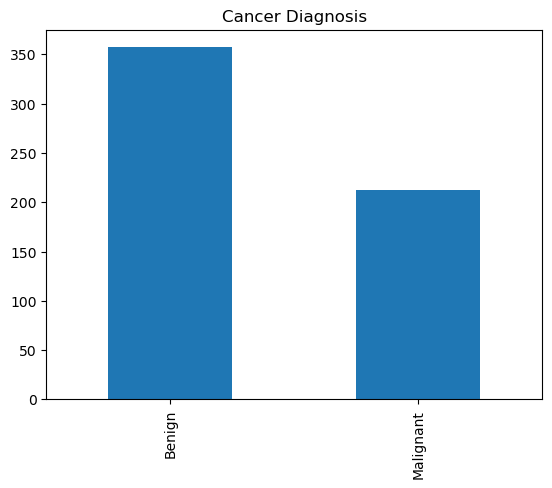

In [11]:
# Plotting a graph of the observations based on the diagnosis

diagnosis_counts = data["diagnosis"].value_counts().sort_index()

diagnosis_counts.plot(kind="bar")
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title('Cancer Diagnosis')
plt.show()

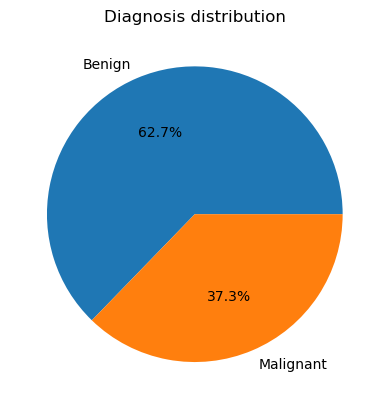

In [12]:
# Plotting a pie chart of the observations based on the diagnosis
diagnosis_counts = data["diagnosis"].value_counts()
labels = ["Benign", "Malignant"]
plt.pie(diagnosis_counts, labels=labels, autopct='%1.1f%%')
plt.title("Diagnosis distribution")
plt.show()

In [13]:
# Label Encoding the diagnosis column
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564          0        13.17         18.22           84.28      537.3   
565          0        10.26         14.71           66.20      321.6   
566          1        15.28         22.41           98.92      710.6   
567          0        14.53         13.98           93.86      644.2   
568          1        21.37         15.10          141.30     1386.0   

     smoothness_mean  compactness_mean  concavity_mean  points_mean  \
564          0.07466           0.05994         0.04859      0.02870   
565          0.09882           0.09159         0.03581      0.02037   
566          0.09057           0.10520         0.05375      0.03263   
567          0.10990           0.09242         0.06895      0.06495   
568          0.10010           0.15150         0.19320      0.12550   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1454  ...         14.90          23.89            95.10   
565         0.1633  ...         10.88          19.48            70.89   
566         0.1727  ...         17.80          28.03           113.80   
567         0.1650  ...         15.80          16.93           103.10   
568         0.1973  ...         22.69          21.84           152.10   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564       687.6            0.1282             0.1965          0.18760   
565       357.1            0.1360             0.1636          0.07162   
566       973.1            0.1301             0.3299          0.36300   
567       749.9            0.1347             0.1478          0.13730   
568      1535.0            0.1192             0.2840          0.40240   

     points_worst  symmetry_worst  dimension_worst  
564       0.10450          0.2235          0.06925  
565       0.04074          0.2434          0.08488  
566       0.12260          0.3175          0.09772  
567       0.10690          0.2606          0.07810  
568       0.19660          0.2730          0.08666  

[5 rows x 31 columns]

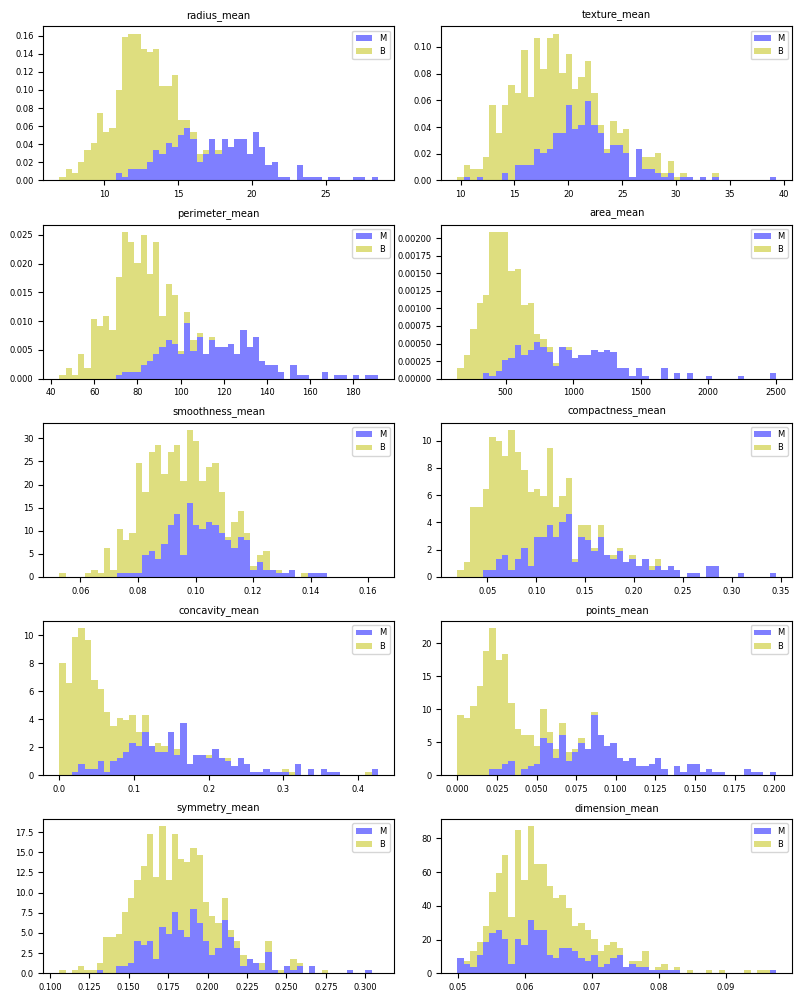

In [14]:
#Relationship between nucleus features and diagnosis¶

features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
datafM=data[data['diagnosis'] ==1]
datafB=data[data['diagnosis'] ==0]

plt.rcParams.update({'font.size': 6})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([datafM[features_mean[idx]],datafB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5, stacked=True, density=True, label=['M','B'], color=['b','y'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

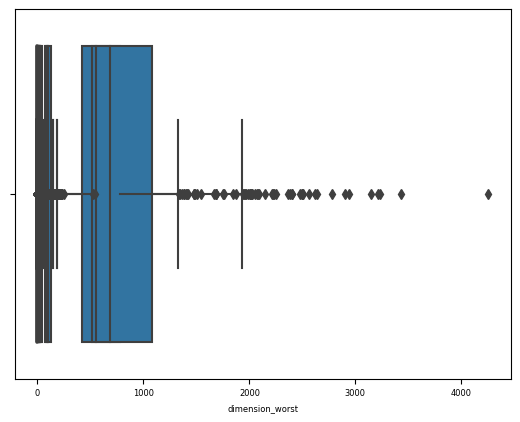

In [15]:
# Plot box plot for each numeric feature
for feature in data.columns:
    if data[feature].dtype != 'object':  # Only plot numeric features
        sns.boxplot(x=data[feature])

In [16]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = (data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))

print(outliers)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        False        False         False           False      False   
1        False        False         False           False      False   
2        False        False         False           False      False   
3        False        False         False           False      False   
4        False        False         False           False      False   
..         ...          ...           ...             ...        ...   
564      False        False         False           False      False   
565      False        False         False           False      False   
566      False        False         False           False      False   
567      False        False         False           False      False   
568      False        False         False           False       True   

     smoothness_mean  compactness_mean  concavity_mean  points_mean  \
0              False             False           False        Fa

<AxesSubplot:>

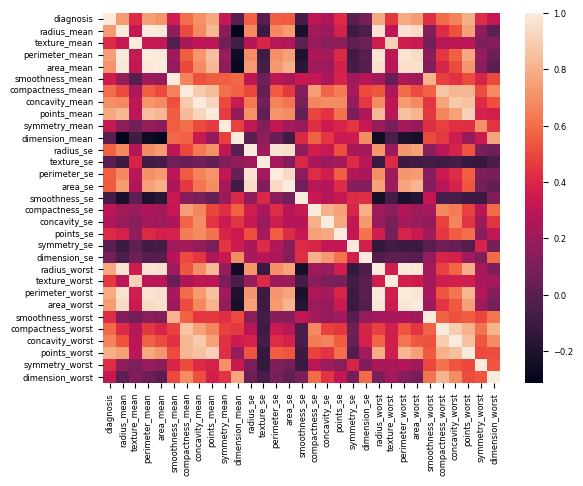

In [17]:
sns.heatmap(data.corr())

In [18]:
# Seperating data into independent and dependent

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"].values

In [19]:
# Splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)

In [20]:
# Let’s take a look at the shape of the created train and test sets:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (455, 30)
Shape of X_test=> (114, 30)
Shape of Y_train=> (455,)
Shape of Y_test=> (114,)


## Building the model (Random Forest)

In [28]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [29]:
# Evaluating on Training set
from sklearn.metrics import f1_score
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [27]:
# Evaluating on Test set

rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.927536231884058
